### Dependencies, includes, paths

In [1]:
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)

import numpy as np
import pandas as pd

BASE_PATH    = 'C:/Users/pavel/github/SMSA/'
DATA_PATH    = f'{BASE_PATH}/data/NASDAQ-100/'
TICKERS_PATH = f'{BASE_PATH}/data/NASDAQ-100.csv'

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors

### Data Import

In [2]:
import smsa
import smsa.data_import

tickers = smsa.data_import.read_tickers(TICKERS_PATH)
tickers = tickers[:20]
data_for_ticker = smsa.data_import.read_historical_data(tickers, DATA_PATH)

table = smsa.data_import.merge_table(data_for_ticker)
table = table.dropna(axis='columns')
table = smsa.data_import.table_logret(table)

logrets_mtx = table.loc[:, table.columns != 'Date']
logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)
sample_size = logrets_mtx.shape[0]
print(f'sample_size: {sample_size}')

sample_size: 200


C:\Users\pavel\AppData\Local\Temp\ipykernel_9072\2780268439.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)


## Mean, cov maximum likelihood estimations for the data

In [3]:
import smsa.pearson
import copy

logrets_mtx_20 = copy.deepcopy(logrets_mtx)
mean = logrets_mtx.mean()
cov  = logrets_mtx.cov()

In [4]:
logrets_mtx.corr(method='pearson')

,AAPL,MSFT,GOOG,GOOGL,AMZN,TSLA,FB,NVDA,COST,PEP,NTES,AVGO,ASML,AZN,CSCO,CMCSA,ADBE,INTC,TMUS,TXN
AAPL,1.000000,0.719477,0.588542,0.596721,0.604433,0.489670,0.555431,0.552893,0.493510,0.364752,0.262539,0.623653,0.530375,0.162623,0.451065,0.288485,0.666081,0.403483,0.325125,0.493516
MSFT,0.719477,1.000000,0.693128,0.707233,0.609897,0.411964,0.547791,0.616106,0.494368,0.458429,0.218710,0.625232,0.593833,0.164051,0.473651,0.374137,0.753489,0.394750,0.413036,0.574815
GOOG,0.588542,0.693128,1.000000,0.974055,0.583503,0.359539,0.620091,0.488620,0.368304,0.349934,0.242656,0.535528,0.465177,0.061592,0.326004,0.332385,0.593822,0.360491,0.391866,0.465608
GOOGL,0.596721,0.707233,0.974055,1.000000,0.583920,0.357492,0.641477,0.516728,0.383539,0.352642,0.296273,0.562775,0.496866,0.077815,0.320060,0.315015,0.604643,0.368840,0.400143,0.493512
AMZN,0.604433,0.609897,0.583503,0.583920,1.000000,0.414015,0.542048,0.530795,0.386474,0.269744,0.229155,0.544339,0.425677,0.032830,0.227304,0.201748,0.619564,0.363567,0.323627,0.410404
TSLA,0.489670,0.411964,0.359539,0.357492,0.414015,1.000000,0.323621,0.470144,0.292242,0.032851,0.389298,0.518690,0.417666,0.130775,0.151402,0.132892,0.458155,0.360004,0.151118,0.470044
FB,0.555431,0.547791,0.620091,0.641477,0.542048,0.323621,1.000000,0.506397,0.420382,0.316897,0.268277,0.542278,0.418789,0.052703,0.244626,0.263446,0.574594,0.292768,0.314616,0.458268
NVDA,0.552893,0.616106,0.488620,0.516728,0.530795,0.470144,0.506397,1.000000,0.379249,0.163171,0.312949,0.708933,0.663713,0.077911,0.236379,0.215472,0.684532,0.457824,0.266715,0.630874
COST,0.493510,0.494368,0.368304,0.383539,0.386474,0.292242,0.420382,0.379249,1.000000,0.476724,0.024962,0.416168,0.370725,0.196148,0.402776,0.271459,0.530172,0.244898,0.238326,0.359936
PEP,0.364752,0.458429,0.349934,0.352642,0.269744,0.032851,0.316897,0.163171,0.476724,1.000000,0.042671,0.279316,0.228191,0.236953,0.461840,0.426156,0.423028,0.184714,0.388794,0.276741


## Statistical Modelling

### Data generation preview

In [5]:
import smsa.sampling

generated_logrets_mtx = smsa.sampling.generate_logrets_mtx(0.5, 252, mean, cov, logrets_mtx.columns)
generated_logrets_mtx

,AAPL,MSFT,GOOG,GOOGL,AMZN,TSLA,FB,NVDA,COST,PEP,NTES,AVGO,ASML,AZN,CSCO,CMCSA,ADBE,INTC,TMUS,TXN
0,-0.002901,-0.016577,-0.019069,-0.019287,0.023817,-0.012657,0.016775,0.006575,0.002991,-0.000549,0.011707,0.004819,-0.008695,-0.000532,-0.016368,0.008176,-0.011959,0.004999,0.013561,0.003814
1,-0.019732,-0.008711,-0.001905,-0.002154,-0.014594,0.017386,-0.013462,0.024504,-0.016309,-0.010557,0.020142,0.005953,-0.005682,-0.006526,-0.020059,-0.016387,-0.015891,-0.012887,-0.019065,0.011065
2,-0.005495,-0.024070,0.004793,0.004492,0.005008,-0.017256,-0.017748,-0.060935,0.004300,-0.016719,-0.052078,-0.028409,0.004066,0.035381,0.001648,-0.035362,-0.027616,0.015095,-0.003839,-0.025171
3,-0.006707,-0.014423,-0.014743,-0.015407,0.019920,-0.003912,0.009423,-0.006475,0.003577,0.007212,-0.017868,-0.003912,-0.029027,0.029407,-0.010983,-0.002748,-0.011759,-0.032257,0.008249,-0.010585
4,-0.007068,0.005321,-0.004337,-0.004400,-0.009937,-0.027737,-0.003781,-0.007359,0.010233,0.005281,-0.021238,0.010712,-0.000744,-0.004925,0.009739,0.008000,0.008237,0.002565,-0.005045,0.013068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,-0.007138,-0.018275,-0.004998,-0.009728,-0.006209,0.032968,-0.006041,-0.021474,-0.001984,0.004396,0.037224,0.025962,0.024835,0.023607,-0.003931,-0.035933,-0.003954,-0.007002,-0.011685,0.021321
248,0.050043,0.044881,0.069997,0.070584,0.048546,0.077155,0.097496,0.104471,0.030042,-0.001869,0.059438,0.041730,0.074909,-0.003269,0.003593,0.011459,0.043707,0.052044,0.038223,0.044524
249,-0.021173,-0.012924,-0.002704,0.001551,-0.036348,-0.039056,-0.007418,0.019257,-0.003143,-0.010539,0.042076,0.003349,-0.003367,0.002532,0.003006,-0.014215,-0.012062,-0.029028,0.008540,-0.003397
250,-0.014168,0.001921,-0.013771,-0.015438,-0.023323,-0.008951,-0.027623,-0.010763,-0.012462,-0.001746,0.022447,-0.007884,-0.028075,-0.004864,0.006523,-0.003956,-0.004620,-0.014903,-0.015900,-0.009882


In [6]:
generated_logrets_mtx.corr(method='pearson')

,AAPL,MSFT,GOOG,GOOGL,AMZN,TSLA,FB,NVDA,COST,PEP,NTES,AVGO,ASML,AZN,CSCO,CMCSA,ADBE,INTC,TMUS,TXN
AAPL,1.000000,0.736014,0.602160,0.614618,0.697976,0.503850,0.608821,0.517228,0.520100,0.411382,0.406778,0.635949,0.517140,0.217225,0.500830,0.372701,0.690508,0.455237,0.299263,0.528642
MSFT,0.736014,1.000000,0.701610,0.699554,0.581999,0.447658,0.546669,0.559257,0.574229,0.556675,0.280832,0.597785,0.543809,0.261804,0.620631,0.475103,0.735000,0.362843,0.491925,0.572521
GOOG,0.602160,0.701610,1.000000,0.973906,0.611547,0.406713,0.653495,0.506886,0.419711,0.338120,0.261815,0.553097,0.473391,0.145393,0.393109,0.295706,0.605610,0.386503,0.320718,0.491870
GOOGL,0.614618,0.699554,0.973906,1.000000,0.605712,0.407656,0.676389,0.528270,0.440240,0.322422,0.311465,0.589488,0.498145,0.167523,0.369441,0.238487,0.609658,0.387164,0.300069,0.512027
AMZN,0.697976,0.581999,0.611547,0.605712,1.000000,0.413745,0.605537,0.437714,0.363351,0.316960,0.252514,0.491882,0.395880,0.085412,0.324453,0.199241,0.584796,0.411008,0.295659,0.357062
TSLA,0.503850,0.447658,0.406713,0.407656,0.413745,1.000000,0.361855,0.535244,0.235712,-0.007596,0.433932,0.559389,0.481361,0.201362,0.172337,0.163357,0.438802,0.341741,0.180060,0.562530
FB,0.608821,0.546669,0.653495,0.676389,0.605537,0.361855,1.000000,0.579284,0.562842,0.350094,0.304630,0.588145,0.441900,0.093130,0.318639,0.173742,0.587901,0.352140,0.250986,0.505958
NVDA,0.517228,0.559257,0.506886,0.528270,0.437714,0.535244,0.579284,1.000000,0.365974,0.224595,0.320192,0.732668,0.609363,0.159073,0.277550,0.229907,0.613718,0.426426,0.161557,0.663891
COST,0.520100,0.574229,0.419711,0.440240,0.363351,0.235712,0.562842,0.365974,1.000000,0.525632,0.069339,0.384463,0.371529,0.207082,0.496603,0.311226,0.558141,0.238915,0.269941,0.384942
PEP,0.411382,0.556675,0.338120,0.322422,0.316960,-0.007596,0.350094,0.224595,0.525632,1.000000,0.008568,0.257828,0.166443,0.316370,0.624935,0.446740,0.451162,0.171216,0.434588,0.279170


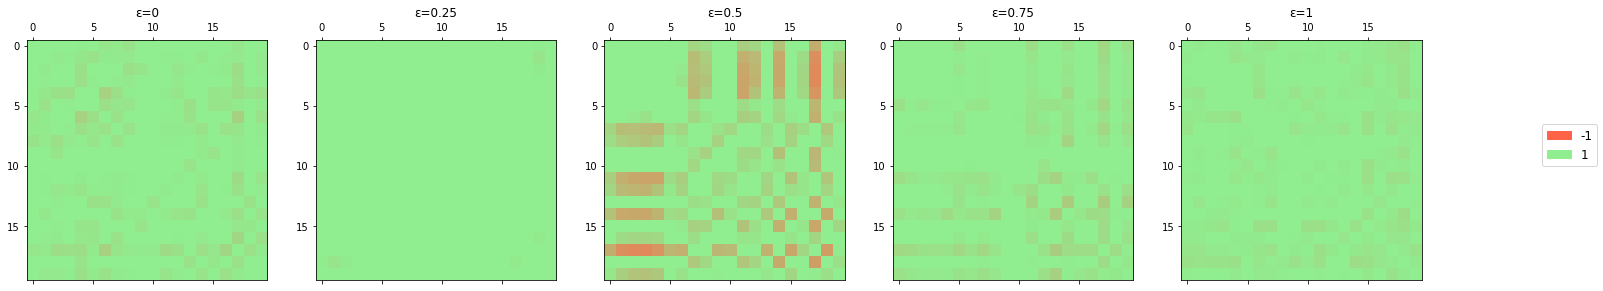

In [7]:
import smsa.plots

blending_params = [0, 0.25, 0.5, 0.75, 1]
plot_titles = [f'ε={bp}' for bp in blending_params]

true_corr = logrets_mtx.corr(method='pearson')
correlation_variation_mtxs = []

for bp in blending_params:
    generated_logrets_mtx = smsa.sampling.generate_logrets_mtx(bp, 252, mean, cov, logrets_mtx.columns)
    corr_diff = true_corr - generated_logrets_mtx.corr(method='pearson')
    correlation_variation_mtxs.append(corr_diff)

smsa.plots.plot_heatmaps(matrices=[correlation_variation_mtxs], titles=[plot_titles], figsize=(25, 10))


## Experiments

In [8]:
import smsa.pearson
import smsa.sign
import smsa.kendall
import smsa.experiments
import smsa.mtcs

from multiprocessing import Pool
from timeit import default_timer as timer

import itertools

testers = [smsa.pearson.CSTestPearson, smsa.sign.CSTestSign, smsa.kendall.CSTestKendall]
corrections = [None, smsa.mtcs.bonferroni, smsa.mtcs.holm, smsa.mtcs.hochberg, smsa.mtcs.benjamini]
blending_params=[x * 0.1 for x in range(0, 11)]
# thresholds=[0, 0.2, 0.4, 0.6, 1]
thresholds = [0.2, 0.4, 0.6]

tester_names = ['PRS', 'SGN', 'KND']
correction_names = ['BNF', 'HLM', 'HBG', 'BJM']
titles = [f'{cmb[0]} + {cmb[1]}' for cmb in itertools.product(tester_names, correction_names)]

significance_lvl = 0.1
iterations = 300
params = itertools.product(testers, corrections)
params = [p + (blending_params, thresholds, significance_lvl, logrets_mtx, iterations) for p in params]

recollect_results = False
# multiprocessing
if __name__ == "__main__":
    if recollect_results:
        pool = Pool(processes=6)
        results = pool.starmap(smsa.experiments.collect_mean_metrics, params)

        for df in results:
            df.to_csv(f'./experiments/{df.iloc[0, 0]}+{df.iloc[0, 1]}.csv')

### Asymptotic 

In [9]:
# import bigger logrets matrix
tickers = smsa.data_import.read_tickers(TICKERS_PATH)
tickers = tickers[:30]
data_for_ticker = smsa.data_import.read_historical_data(tickers, DATA_PATH)

table = smsa.data_import.merge_table(data_for_ticker)
table = table.dropna(axis='columns')
table = smsa.data_import.table_logret(table)

logrets_mtx = table.loc[:, table.columns != 'Date']
logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)
sample_size = logrets_mtx.shape[0]
print(f'sample_size: {sample_size}')

sample_size: 200


C:\Users\pavel\AppData\Local\Temp\ipykernel_9072\2513851161.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logrets_mtx.drop(logrets_mtx.tail(52).index, inplace = True)


In [10]:
tester_names = ['PRS', 'SGN', 'KND']
correction_names = ['BNF', 'HLM', 'HBG', 'BJM']
titles = [f'{cmb[0]} + {cmb[1]}' for cmb in itertools.product(tester_names, correction_names)]

blending_param = 1

significance_lvl = 0.1
stepdown = 1
iterations = 300

params = itertools.product(testers, corrections)
params = [p + (blending_param, thresholds, significance_lvl, logrets_mtx, stepdown, iterations) for p in params]

recollect_results = False
# multiprocessing 
if __name__ == "__main__":
    if recollect_results:
        pool = Pool(processes=6)
        results = pool.starmap(smsa.experiments.collect_asymptotic_metrics, params)

        for df in results:
            df.to_csv(f'./experiments/asymptotic/{df.iloc[0, 0]}+{df.iloc[0, 1]}.csv')

### Read logs

In [11]:
import glob
files = glob.glob('./experiments/*.csv')

pearson_logs = glob.glob('./experiments/pearson*.csv')
kendall_logs = glob.glob('./experiments/kendall*.csv')
sign_logs    = glob.glob('./experiments/sign*.csv')

In [12]:
from typing import List
import pandas as pd

def read_logdfs(logfiles: List[str]) -> List[pd.DataFrame]:
    logdfs = []
    for file in logfiles:
        df = pd.read_csv(file)
        df = df.iloc[: , 1:]
        logdfs.append(df)   
    return logdfs 


def filter_by_threshold(dfs: List[pd.DataFrame], th: float) -> List[pd.DataFrame]:
    filtered = []
    for df in dfs:
        filtered.append(df.loc[df['th'] == th])
    return filtered

In [13]:
pearson_dfs = read_logdfs(pearson_logs)
kendall_dfs = read_logdfs(kendall_logs)
sign_dfs = read_logdfs(sign_logs)

asymptotic_pearson_logs = glob.glob('./experiments/asymptotic/pearson*.csv')
asymptotic_pearson_dfs  = read_logdfs(asymptotic_pearson_logs)

asymptotic_kendall_logs = glob.glob('./experiments/asymptotic/kendall*.csv')
asymptotic_kendall_dfs  = read_logdfs(asymptotic_kendall_logs)

asymptotic_sign_logs = glob.glob('./experiments/asymptotic/sign*.csv')
asymptotic_sign_dfs  = read_logdfs(asymptotic_sign_logs)

# Loss and Risk functions

## 0. Expected cases for the data

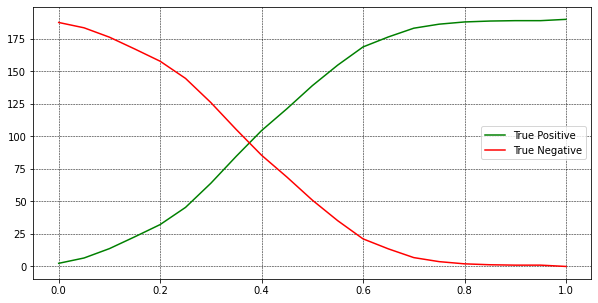

In [14]:
smsa.experiments.expected_plot(logrets_mtx_20, blending_params=[1], iterations=10, figsize=(10, 5))

In [15]:
thresholds = [0.2, 0.4, 0.6]

## 1. False Negative + False Positive + Risk (0.5 * P(FN) + 0.5 * P(FP))

In [16]:
def fn_fp_risk(dfs: List[pd.DataFrame], x='bp', xlabel='ε - blending parameter'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3
    tester_name = None

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):
        th_filtered = filter_by_threshold(dfs, th)
    
        for df in th_filtered:
            tester_name = df.iloc[0,0]
            correction_name = df.iloc[0,1]

            # plot FP
            fp = df['FP']
            ax[row][0].plot(df[x], fp, label=f'{correction_name}')
            ax[row][0].set_title(f'False Positives, th={th}', fontsize=12)
            ax[row][0].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # plot FN
            fn = df['FN']
            ax[row][1].plot(df[x], fn, label=f'{correction_name}')
            ax[row][1].set_title(f'False Negatives, th={th}', fontsize=12)
            ax[row][1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # compute and plot risk function
            risk_fp = (df['FP'] / df['ntests'])
            risk_fn = (df['FN'] / df['ntests'])
            risk = 0.5 * risk_fp + 0.5 * risk_fn
            ax[row][2].plot(df[x], risk, label=f'{correction_name}')
            ax[row][2].set_title(f'Risk = 0.5*P(FP)+0.5*P(FN), th={th}', fontsize=12)
            ax[row][2].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.setp(ax[-1, :], xlabel=xlabel)
    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

### Pearson

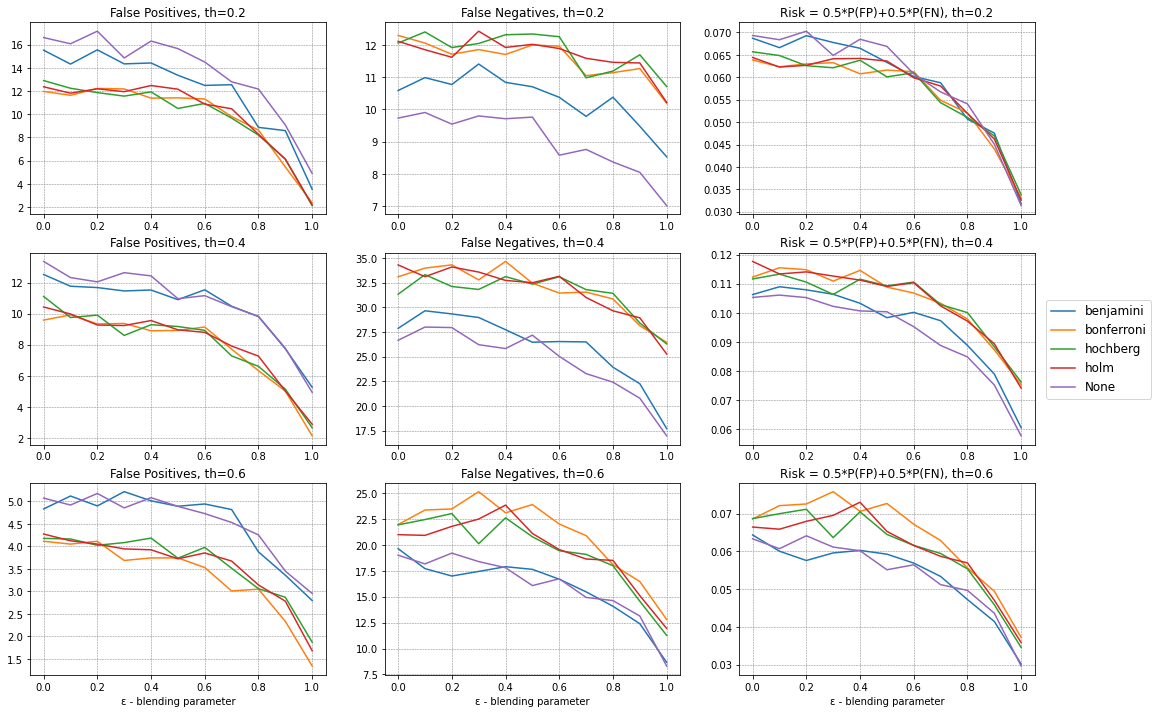

In [17]:
fn_fp_risk(pearson_dfs)

### Sign

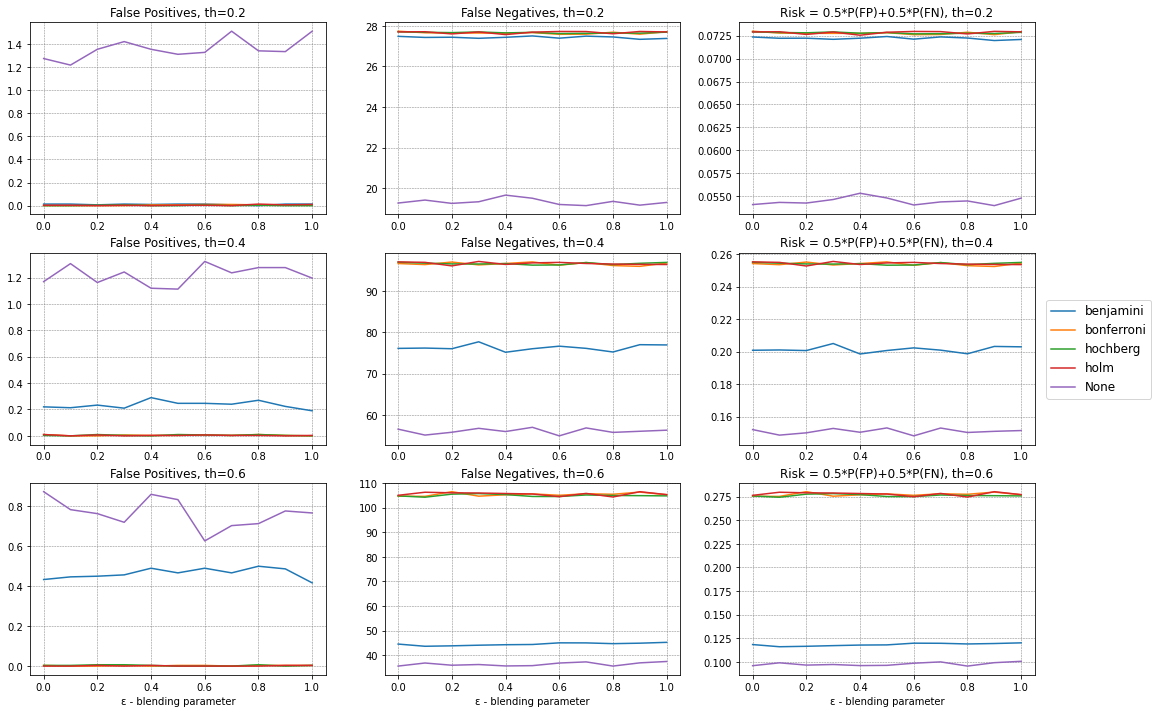

In [18]:
fn_fp_risk(sign_dfs)

### Kendall

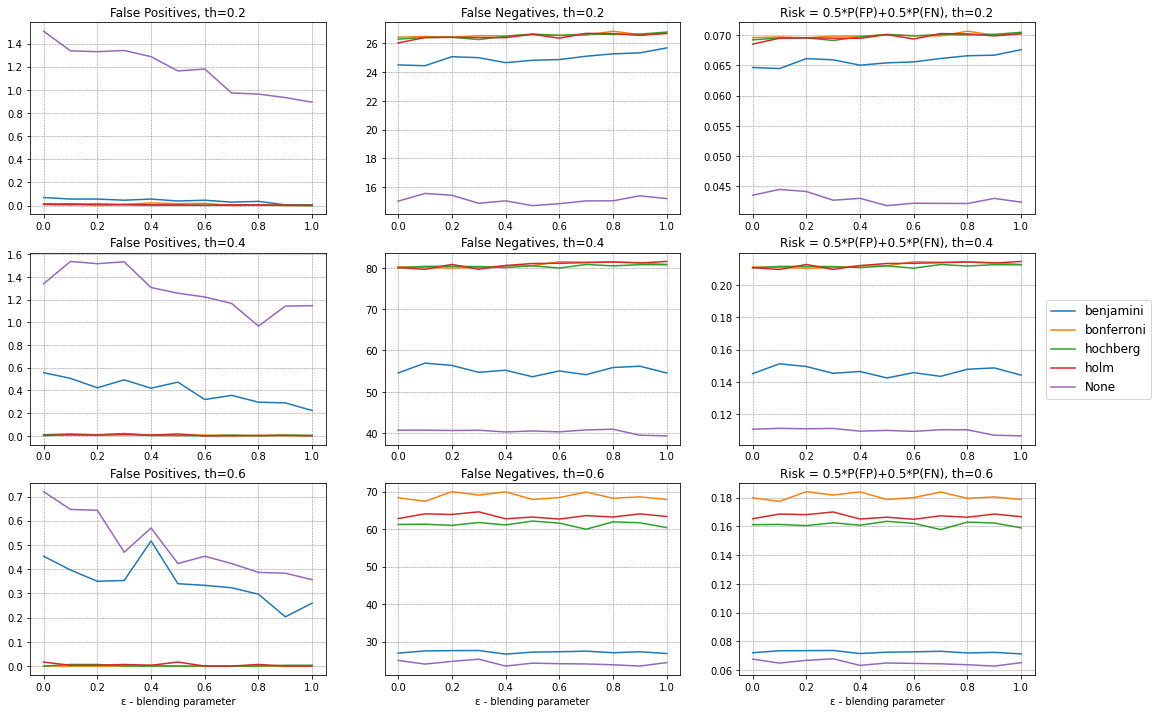

In [19]:
fn_fp_risk(kendall_dfs)

## 2. FDR, Power, Accuracy

In [20]:
def fdr_power_acc(dfs: List[pd.DataFrame], x='bp', xlabel='ε - blending parameter'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3
    tester_name = None

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):
        th_filtered = filter_by_threshold(dfs, th)
    
        for df in th_filtered:
            tester_name = df.iloc[0,0]
            correction_name = df.iloc[0,1]

            # compute and plot FDR function
            fdr = df['FP'] / (df['FP'] + df['TP'])
            ax[row][0].plot(df[x], fdr, label=f'{correction_name}')
            ax[row][0].set_title(f'FDR, th={th}', fontsize=12)
            ax[row][0].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # compute and plot Power function
            power = 1 - (df['FN'] / df['ntests'])
            ax[row][1].plot(df[x], power, label=f'{correction_name}')
            ax[row][1].set_title(f'Power, th={th}', fontsize=12)
            ax[row][1].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

            # compute and plot ACC function
            acc = (df['TP'] + df['TN']) / df['ntests']
            ax[row][2].plot(df[x], acc, label=f'{correction_name}')
            ax[row][2].set_title(f'ACC, th={th}', fontsize=12)
            ax[row][2].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.setp(ax[-1, :], xlabel=xlabel)
    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

### Pearson

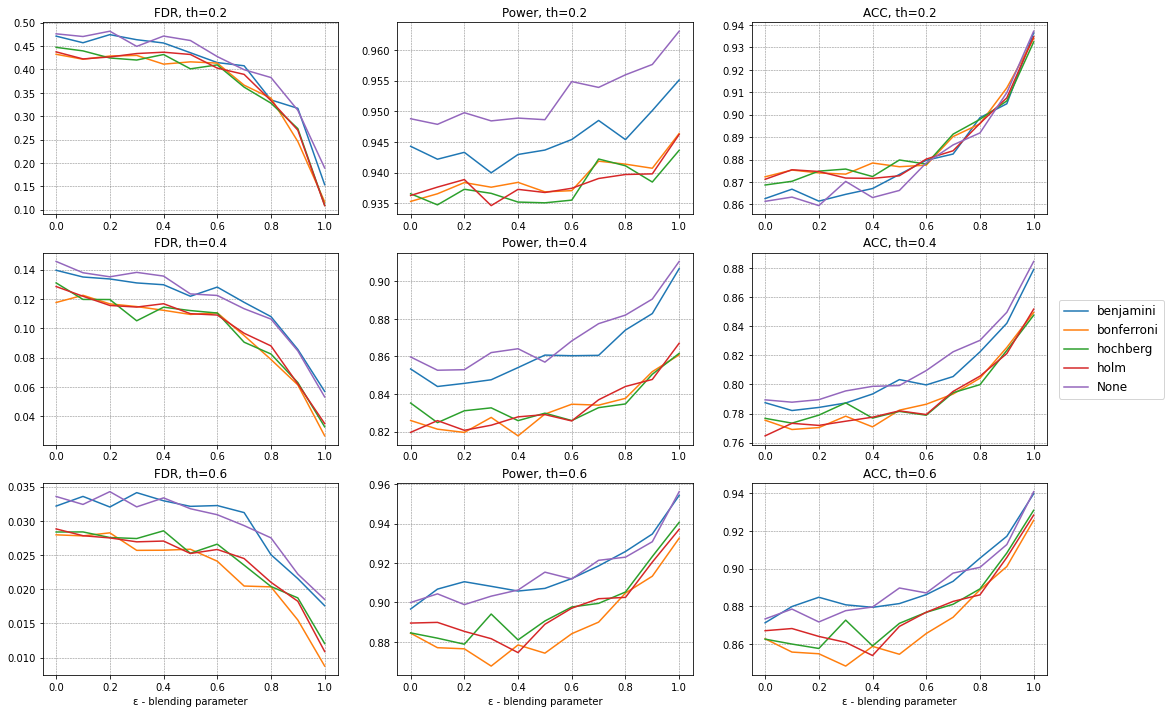

In [21]:
fdr_power_acc(pearson_dfs)

### Sign

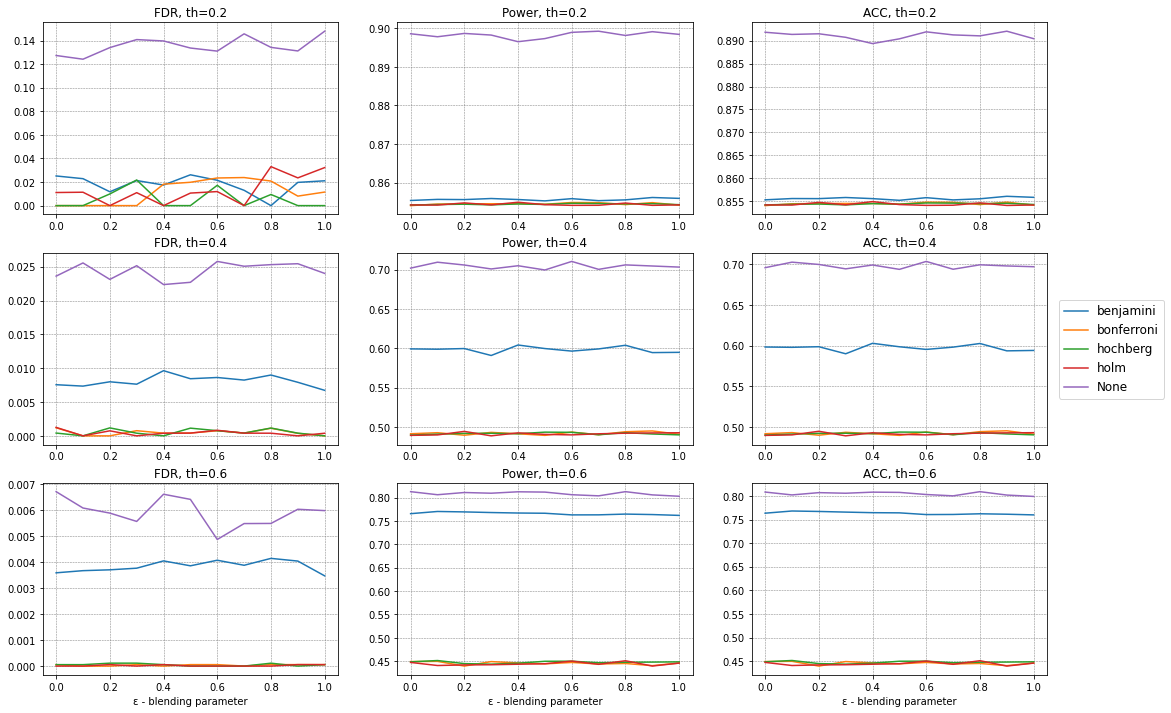

In [22]:
fdr_power_acc(sign_dfs)

### Kendall

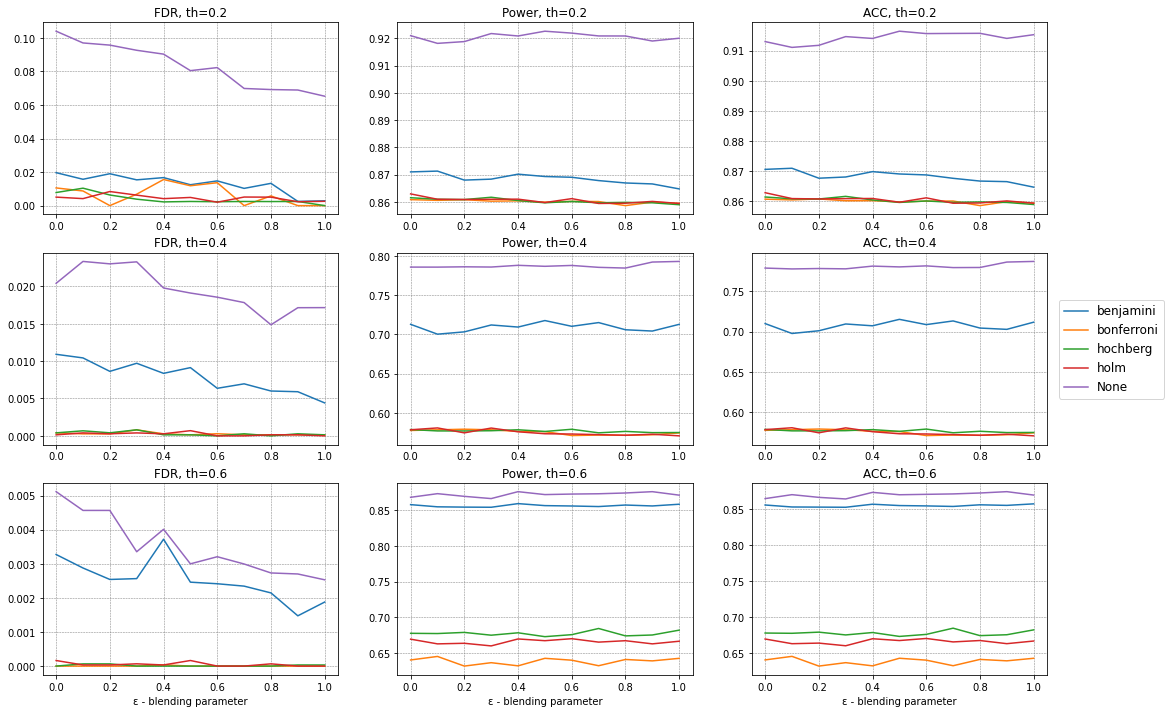

In [23]:
fdr_power_acc(kendall_dfs)

## 3. P(FP=0) for Pearson, Sign, and Kendall

In [24]:
def pfp_zero(tester_dfs=[pearson_dfs, sign_dfs, kendall_dfs], x='bp', xlabel='ε - blending parameter'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):

        tester_names = ['Pearson', 'Sign', 'Kendall']

        for i, tester_name in enumerate(tester_names):
            th_filtered = filter_by_threshold(tester_dfs[i], th)
            for df in th_filtered:
                correction_name = df.iloc[0,1]

                # compute and plot the probability P(FP=0) function
                _pfp_zero = df['P(FP=0)']
                ax[row][i].plot(df[x], _pfp_zero, label=f'{correction_name}')
                ax[row][i].set_title(f'P(FP=0) for {tester_name}, th={th}', fontsize=12)
                ax[row][i].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.setp(ax[-1, :], xlabel=xlabel)
    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

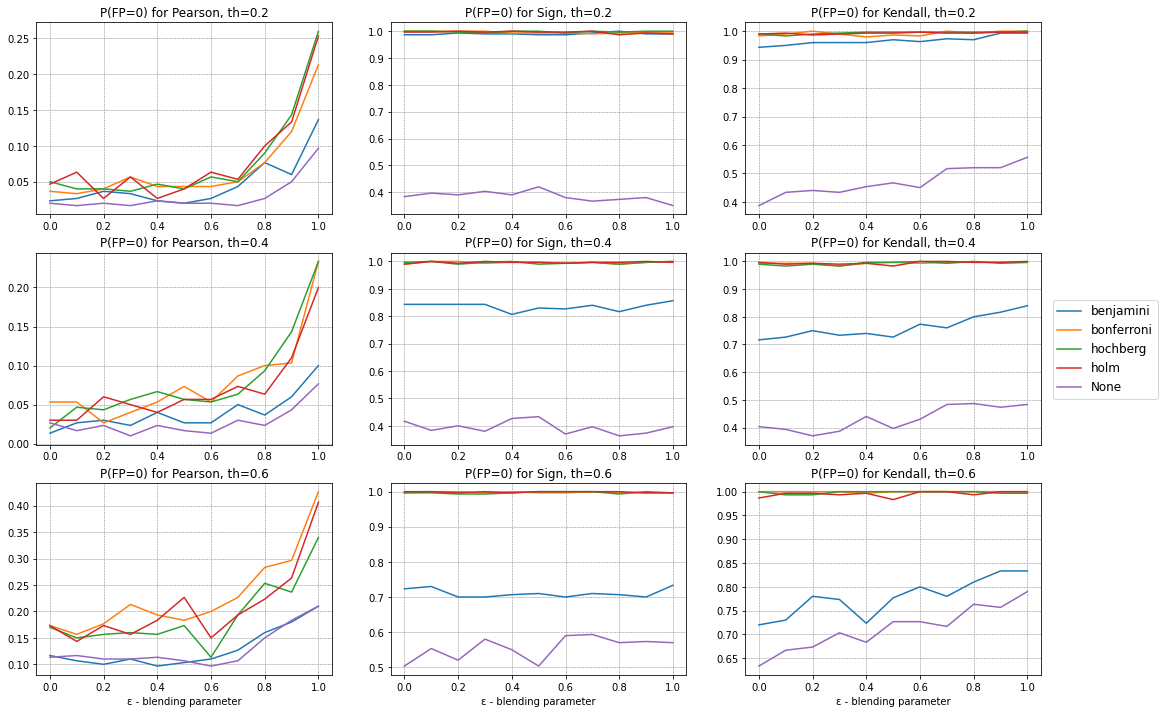

In [25]:
pfp_zero()

## 4. TN / ETN for Pearson, Sign, Kendall
ETN - Expected True Negative

In [26]:
def true_edges_plotted(tester_dfs = [pearson_dfs, sign_dfs, kendall_dfs], x='bp', xlabel='ε - blending parameter'):
    # plotting
    plot_rows = len(thresholds)
    plot_cols = 3

    fig, ax = plt.subplots(nrows=plot_rows, ncols=plot_cols, squeeze=False, figsize=(18, 12))
    for row, th in enumerate(thresholds):

        tester_names = ['Pearson', 'Sign', 'Kendall']

        for i, tester_name in enumerate(tester_names):
            th_filtered = filter_by_threshold(tester_dfs[i], th)
            for df in th_filtered:
                correction_name = df.iloc[0,1]

                # compute and plot the probability P(FP=0) function
                _true_edges_plotted = df['TN'] / df['EN']
                ax[row][i].plot(df[x], _true_edges_plotted, label=f'{correction_name}')
                ax[row][i].set_title(f'TN/ETN for {tester_name}, th={th}', fontsize=12)
                ax[row][i].grid(color = 'grey', linestyle = '--', linewidth = 0.5)

    plt.setp(ax[-1, :], xlabel=xlabel)
    plt.legend(loc=(1.04, 1.44), prop={'size': 12})
    plt.show()

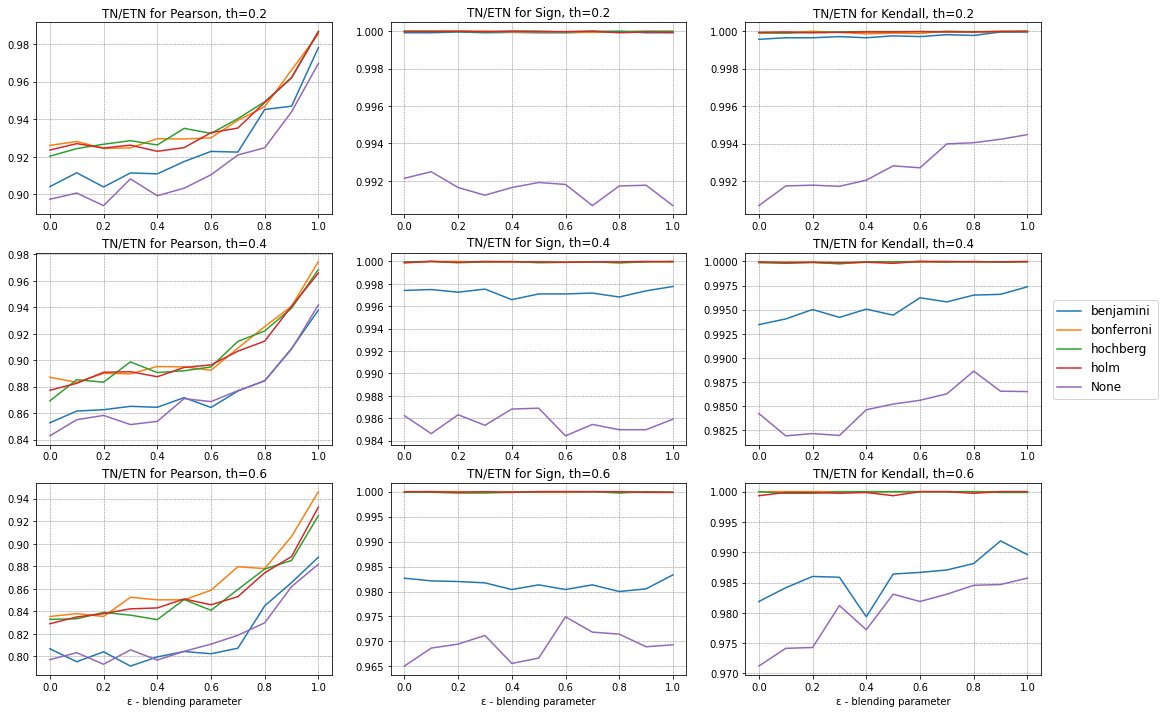

In [27]:
true_edges_plotted()

## 5. Asymptotiс: False Negative, False Positive, Risk (0.5 * P(FN) + 0.5 * P(FP)) 

### Pearson

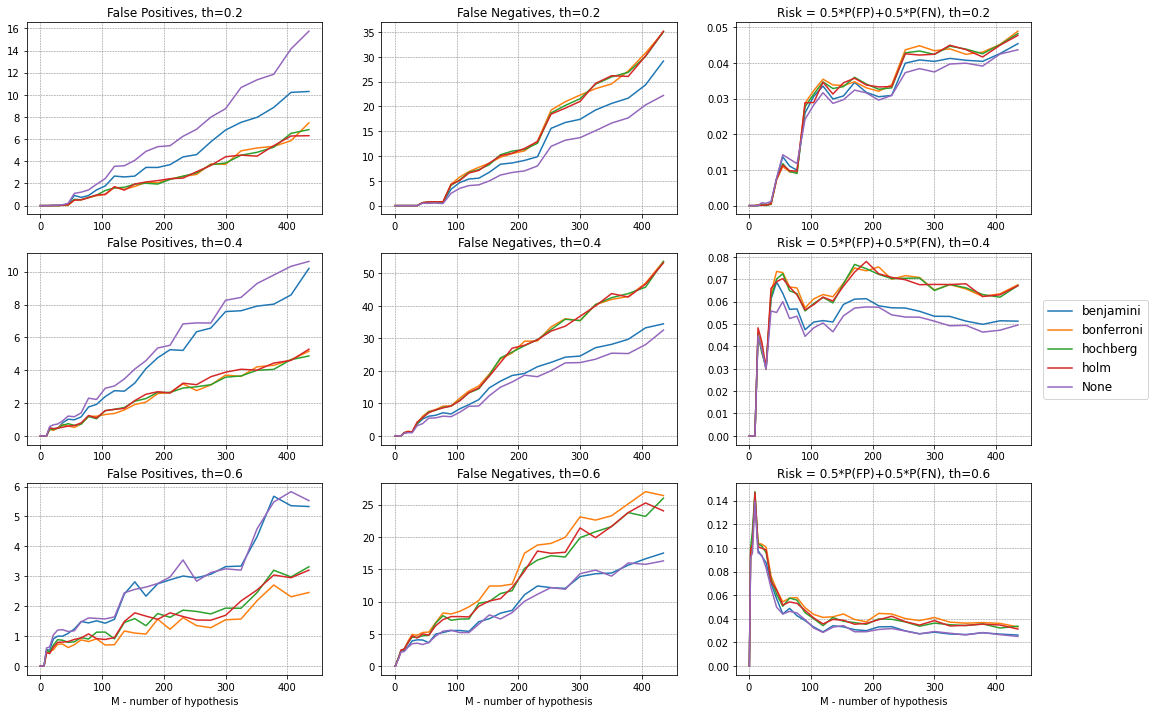

In [28]:
fn_fp_risk(asymptotic_pearson_dfs, x='ntests', xlabel='M - number of hypothesis')

### Sign

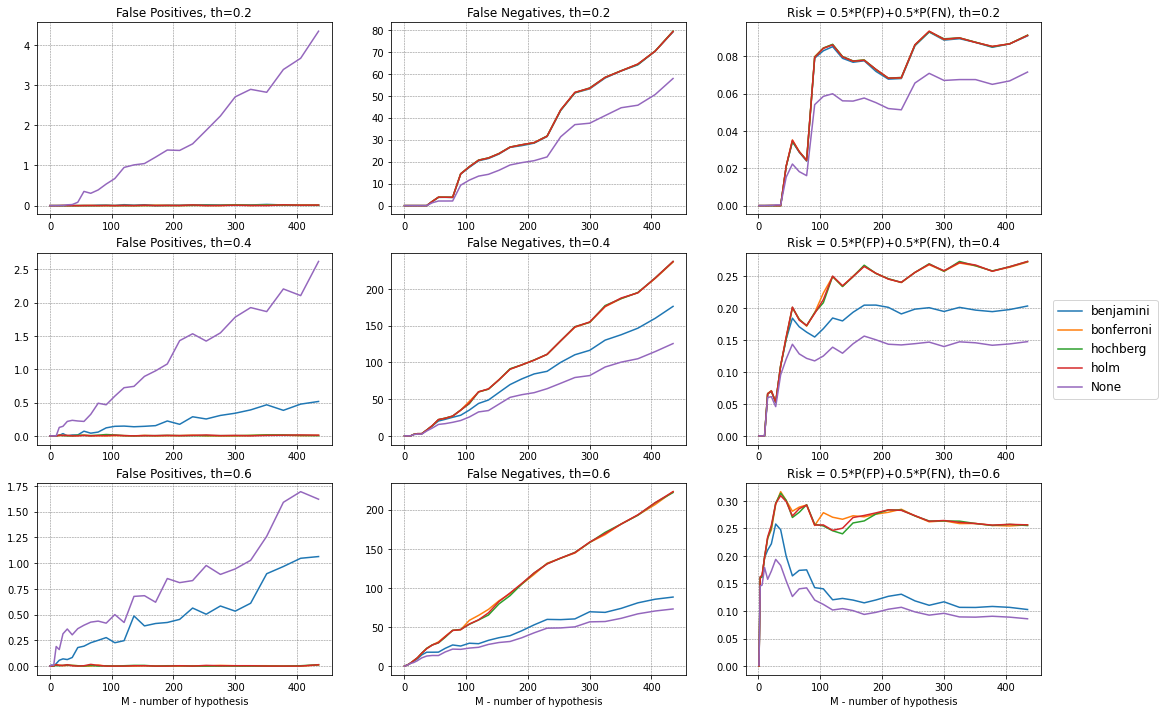

In [29]:
fn_fp_risk(asymptotic_sign_dfs, x='ntests', xlabel='M - number of hypothesis')

### Kendall

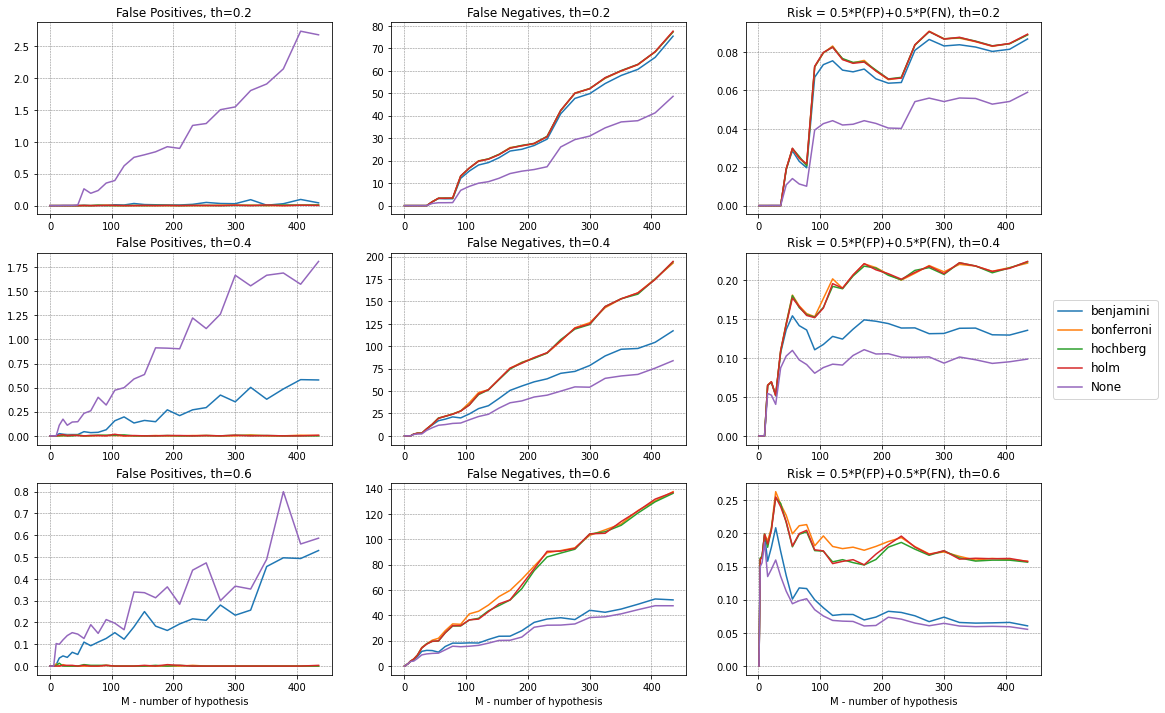

In [30]:
fn_fp_risk(asymptotic_kendall_dfs, x='ntests', xlabel='M - number of hypothesis')

## 6. Asymptotic FDR, Power, Accuracy

### Pearson

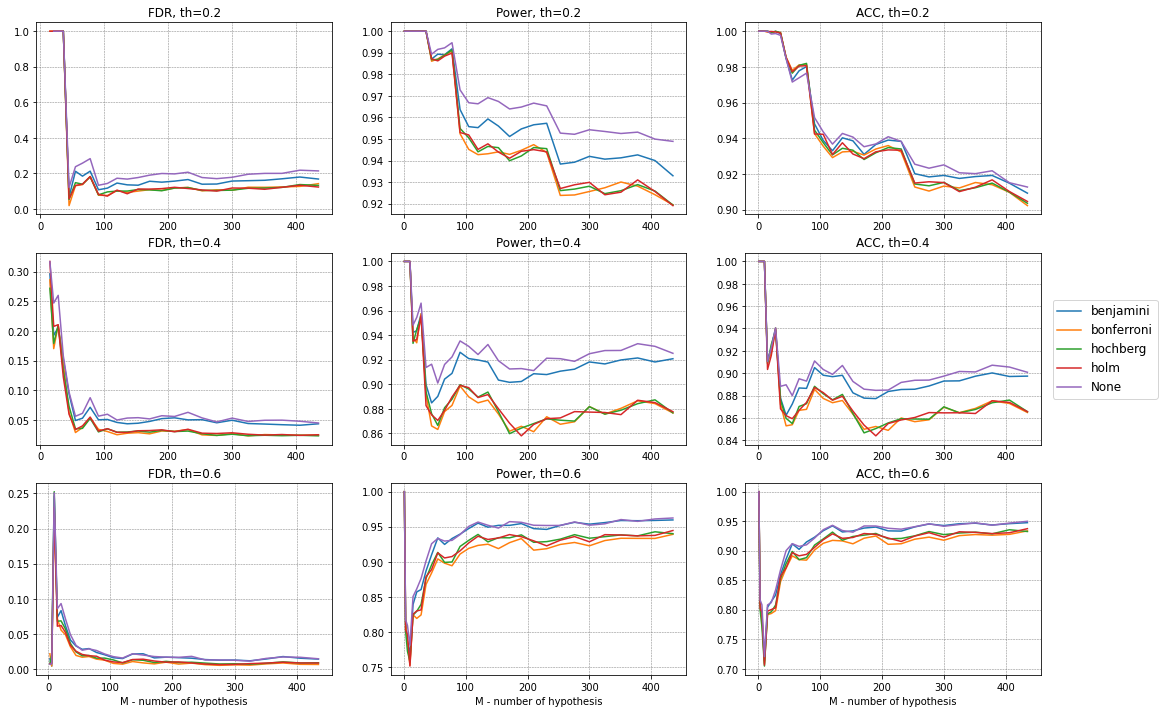

In [31]:
fdr_power_acc(asymptotic_pearson_dfs, x='ntests', xlabel='M - number of hypothesis')

### Sign

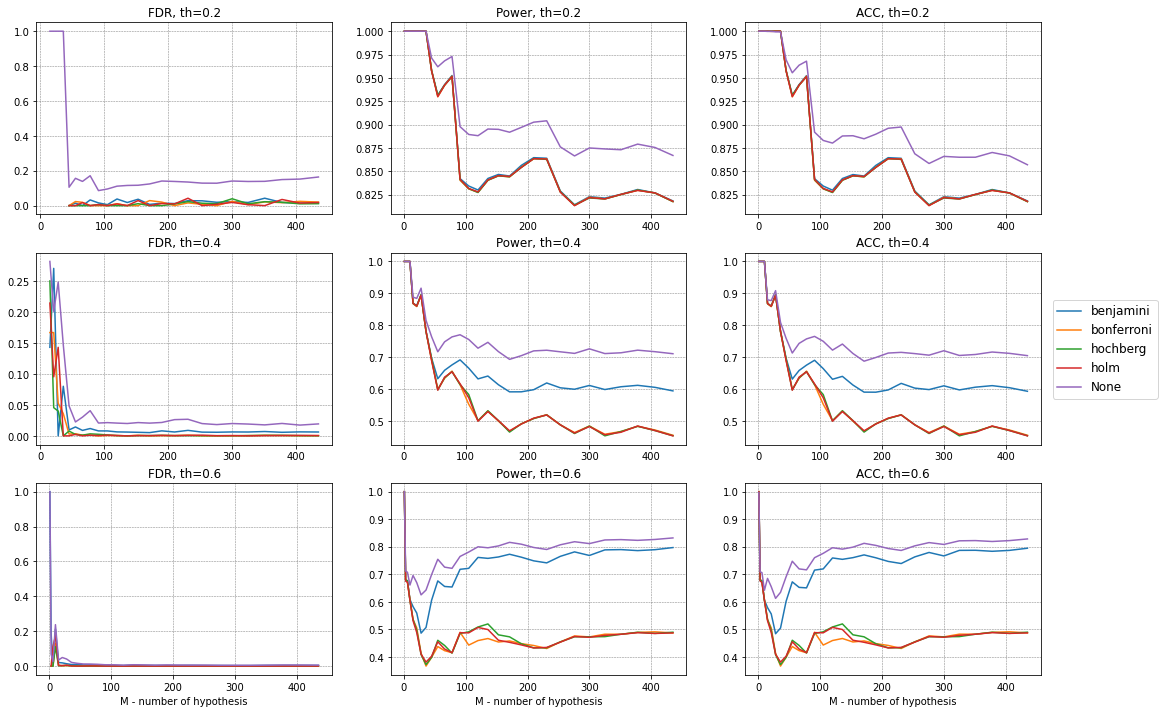

In [32]:
fdr_power_acc(asymptotic_sign_dfs, x='ntests', xlabel='M - number of hypothesis')


### Kendall

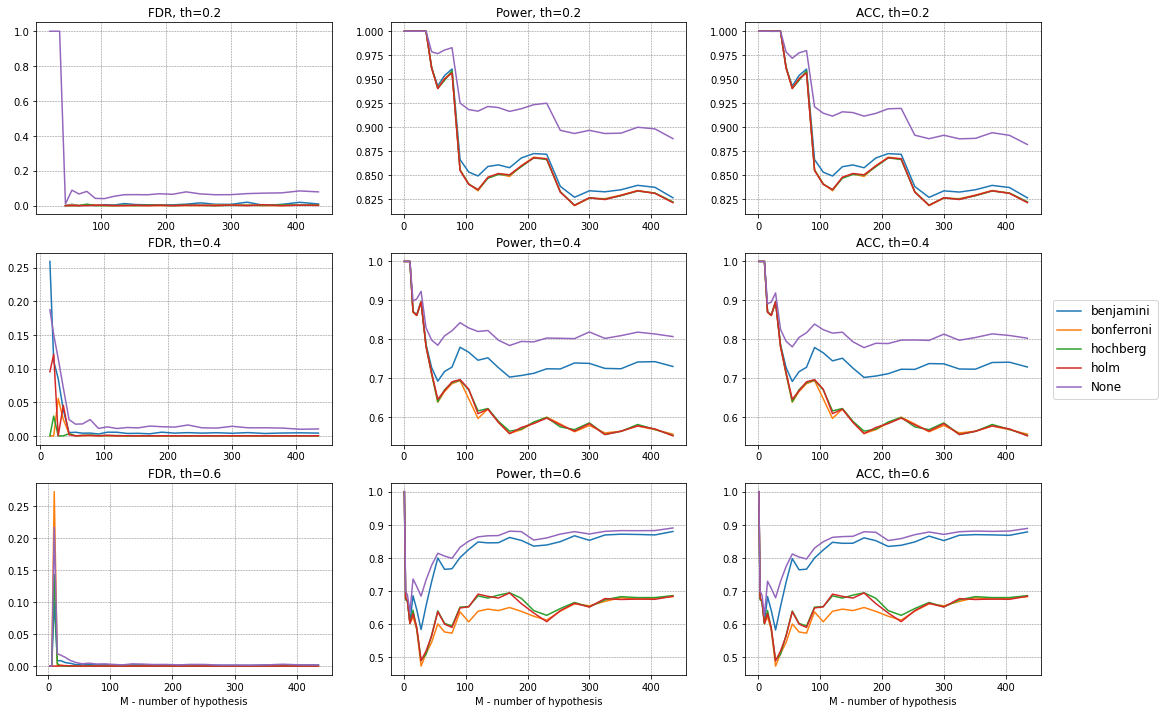

In [33]:
fdr_power_acc(asymptotic_kendall_dfs, x='ntests', xlabel='M - number of hypothesis')

## 7. Asymptotic P(FP=0) for Pearson, Sign, and Kendall

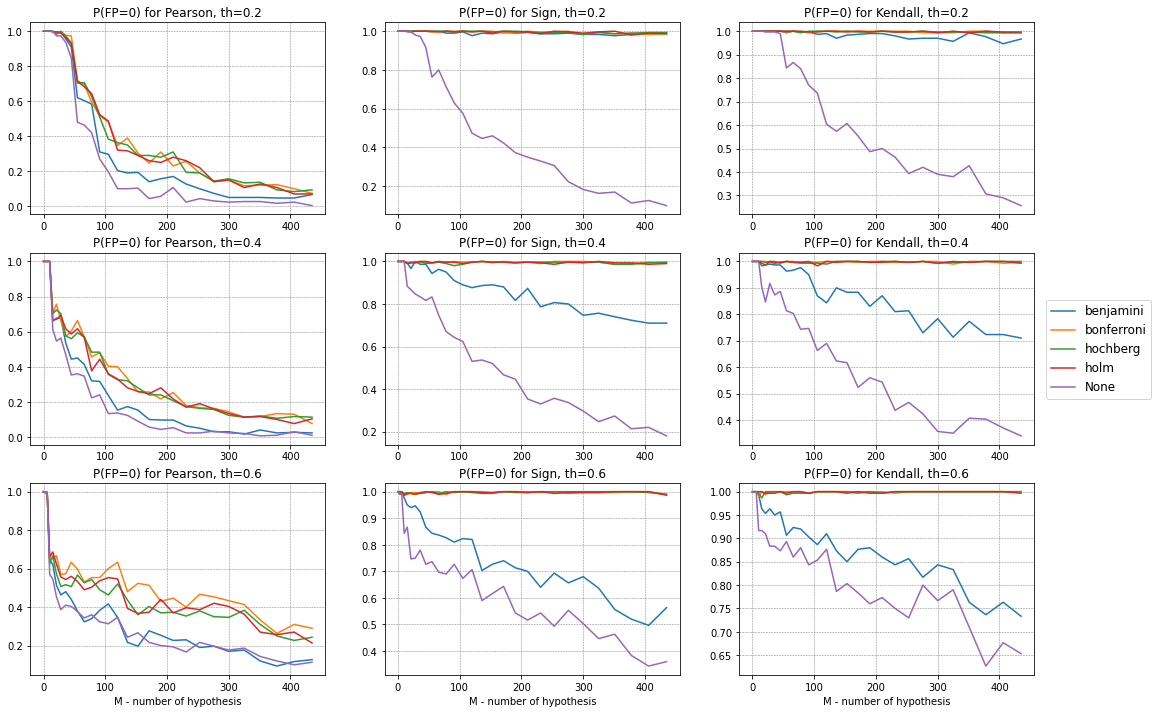

In [34]:
pfp_zero(tester_dfs=[asymptotic_pearson_dfs, asymptotic_sign_dfs, asymptotic_kendall_dfs],
         x='ntests', xlabel='M - number of hypothesis')

## 8. Asymptotic TN / ETN for Pearson, Sign, Kendall
ETN - Expected True Negative

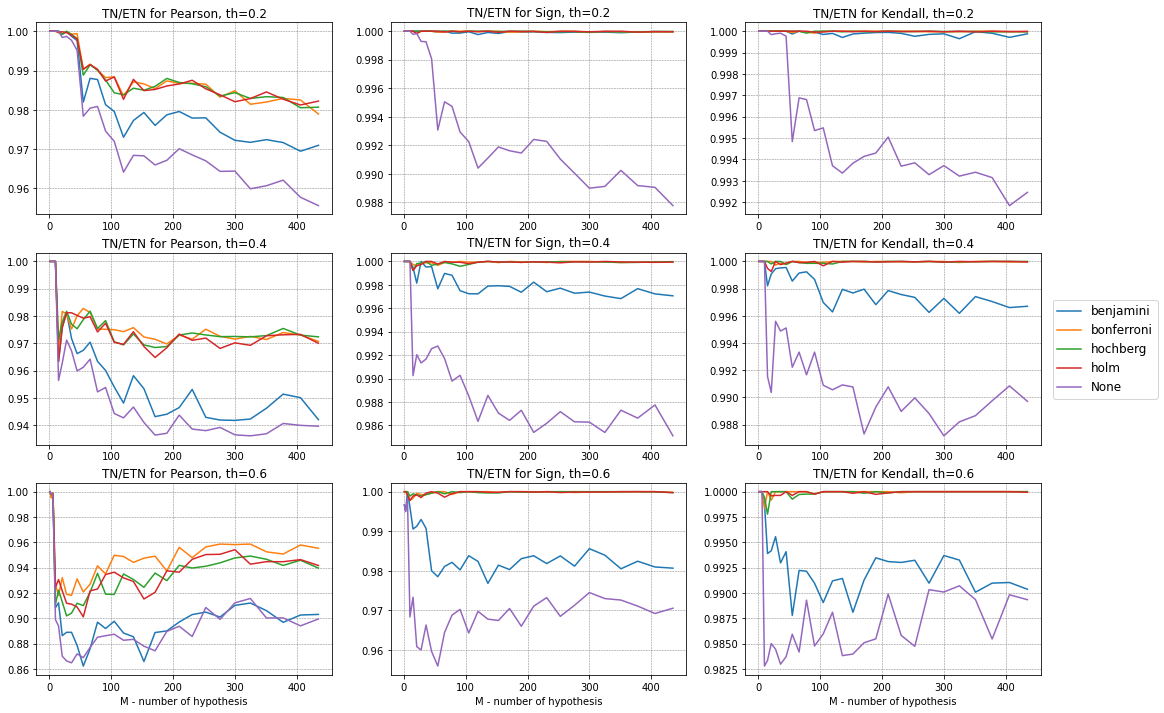

In [35]:
true_edges_plotted(tester_dfs=[asymptotic_pearson_dfs, asymptotic_sign_dfs, asymptotic_kendall_dfs],
                   x='ntests', xlabel='M - number of hypothesis')